# Customer Churn Prediction

#### Load libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#### Configuration

In [2]:
seed = 42

#### Load dataset

In [3]:
df = pd.read_excel('data/ecommerce_dataset.xlsx',sheet_name='E Comm')

In [4]:
df.shape

(5630, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.50,1625.39,50001.0,51408.25,52815.50,54222.75,55630.00
Churn,5630.0,0.17,0.37,0.0,0.00,0.00,0.00,1.00
Tenure,5366.0,10.19,8.56,0.0,2.00,9.00,16.00,61.00
CityTier,5630.0,1.65,0.92,1.0,1.00,1.00,3.00,3.00
WarehouseToHome,5379.0,15.64,8.53,5.0,9.00,14.00,20.00,127.00
HourSpendOnApp,5375.0,2.93,0.72,0.0,2.00,3.00,3.00,5.00
NumberOfDeviceRegistered,5630.0,3.69,1.02,1.0,3.00,4.00,4.00,6.00
SatisfactionScore,5630.0,3.07,1.38,1.0,2.00,3.00,4.00,5.00
NumberOfAddress,5630.0,4.21,2.58,1.0,2.00,3.00,6.00,22.00
Complain,5630.0,0.28,0.45,0.0,0.00,0.00,1.00,1.00


#### Data preparation and data cleaning

In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [8]:
del df['customerid']

In [9]:
df.isna().sum()

churn                            0
tenure                         264
preferredlogindevice             0
citytier                         0
warehousetohome                251
preferredpaymentmode             0
gender                           0
hourspendonapp                 255
numberofdeviceregistered         0
preferedordercat                 0
satisfactionscore                0
maritalstatus                    0
numberofaddress                  0
complain                         0
orderamounthikefromlastyear    265
couponused                     256
ordercount                     258
daysincelastorder              307
cashbackamount                   0
dtype: int64

In [10]:
# Fill NA values
df['tenure'] = df['tenure'].fillna(value=df['tenure'].median())
df['warehousetohome'] = df['warehousetohome'].fillna(value=df['warehousetohome'].median())
df['hourspendonapp'] = df['hourspendonapp'].fillna(value=df['hourspendonapp'].median())
df['orderamounthikefromlastyear'] = df['orderamounthikefromlastyear'].fillna(value=df['orderamounthikefromlastyear'].median())
df['couponused'] = df['couponused'].fillna(value=df['couponused'].median())
df['ordercount'] = df['ordercount'].fillna(value=df['ordercount'].median())
df['daysincelastorder'] = df['daysincelastorder'].fillna(value=df['daysincelastorder'].median())

In [11]:
df.head().T

,0,1,2,3,4
churn,1,1,1,1,1
tenure,4.0,9.0,9.0,0.0,0.0
preferredlogindevice,Mobile Phone,Phone,Phone,Phone,Phone
citytier,3,1,1,3,1
warehousetohome,6.0,8.0,30.0,15.0,12.0
preferredpaymentmode,Debit Card,UPI,Debit Card,Debit Card,CC
gender,Female,Male,Male,Male,Male
hourspendonapp,3.0,3.0,2.0,2.0,3.0
numberofdeviceregistered,3,4,4,4,3
preferedordercat,Laptop & Accessory,Mobile,Mobile,Laptop & Accessory,Mobile


In [12]:
df.nunique()

churn                             2
tenure                           36
preferredlogindevice              3
citytier                          3
warehousetohome                  34
preferredpaymentmode              7
gender                            2
hourspendonapp                    6
numberofdeviceregistered          6
preferedordercat                  6
satisfactionscore                 5
maritalstatus                     3
numberofaddress                  15
complain                          2
orderamounthikefromlastyear      16
couponused                       17
ordercount                       16
daysincelastorder                22
cashbackamount                 2586
dtype: int64

In [13]:
df['preferredpaymentmode'].value_counts()

preferredpaymentmode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

In [14]:
# Unifying payment methods
df.loc[df['preferredpaymentmode'] == 'COD', 'preferredpaymentmode'] = 'Cash on Delivery'
df.loc[df['preferredpaymentmode'] == 'CC', 'preferredpaymentmode'] = 'Credit Card'

In [15]:
df['preferredpaymentmode'].value_counts()

preferredpaymentmode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64

In [16]:
df['preferredlogindevice'].value_counts()

preferredlogindevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64

In [17]:
# Unifying devices
df.loc[df['preferredlogindevice'] == 'Phone', 'preferredlogindevice'] = 'Mobile Phone'

In [18]:
df['preferredlogindevice'].value_counts()

preferredlogindevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64

In [19]:
df['preferedordercat'].value_counts()

preferedordercat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64

In [20]:
# Unifying order categories
df.loc[df['preferedordercat'] == 'Mobile', 'preferedordercat'] = 'Mobile Phone'

In [21]:
df['preferedordercat'].value_counts()

preferedordercat
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: count, dtype: int64

In [22]:
df['churn'].value_counts()

churn
0    4682
1     948
Name: count, dtype: int64

In [23]:
df['churn'].mean()

np.float64(0.16838365896980462)

In [24]:
numerical = ['tenure', 'warehousetohome', 'hourspendonapp','numberofdeviceregistered', 
             'numberofaddress', 'orderamounthikefromlastyear', 'couponused', 'ordercount',
             'daysincelastorder', 'cashbackamount']

categorical = ['citytier','preferredlogindevice', 'preferredpaymentmode',
               'satisfactionscore', 'gender', 'complain', 'preferedordercat', 
               'maritalstatus']

In [25]:
# Convert columns to categories
for col in categorical:
  df[col] = df[col].astype(str)

In [26]:
df.dtypes

churn                            int64
tenure                         float64
preferredlogindevice            object
citytier                        object
warehousetohome                float64
preferredpaymentmode            object
gender                          object
hourspendonapp                 float64
numberofdeviceregistered         int64
preferedordercat                object
satisfactionscore               object
maritalstatus                   object
numberofaddress                  int64
complain                        object
orderamounthikefromlastyear    float64
couponused                     float64
ordercount                     float64
daysincelastorder              float64
cashbackamount                 float64
dtype: object

#### Splitting dataset into Train, Validation and Test datasets

In [27]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=seed)

In [28]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=seed)

In [29]:
print(len(df_train),len(df_val),len(df_test))

3378 1126 1126


In [30]:
# reset index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [31]:
y_train = df_train["churn"]
y_val = df_val["churn"]
y_test = df_test["churn"]

In [32]:
# delete "churn" column from datasets
del df_train["churn"]
del df_val["churn"]
del df_test["churn"]

#### Exploratory data analysis and feature importance analysis

In [33]:
df_train_full["churn"].value_counts(normalize=True)

churn
0    0.830595
1    0.169405
Name: proportion, dtype: float64

In [34]:
churn_female = df_train_full[df_train_full["gender"] == "Female"].churn.mean()
churn_male = df_train_full[df_train_full["gender"] == "Male"].churn.mean()
print(f"churn_female: {churn_female.round(3)}, churn_male: {churn_male.round(3)}")

churn_female: 0.153, churn_male: 0.18


In [35]:
churn_single = df_train_full[df_train_full["maritalstatus"] == "Single"].churn.mean()
churn_married = df_train_full[df_train_full["maritalstatus"] == "Married"].churn.mean()
churn_divorced = df_train_full[df_train_full["maritalstatus"] == "Divorced"].churn.mean()
print(f"churn_single: {churn_single.round(3)}, churn_married: {churn_married.round(3)}, churn_divorced: {churn_divorced.round(3)}")

churn_single: 0.271, churn_married: 0.116, churn_divorced: 0.142


In [36]:
global_churn_rate = df_train_full["churn"].mean()
round(global_churn_rate, 3)

np.float64(0.169)

##### Churn rate and Risk ratio

In [37]:
for c in categorical:
    print(c)
    df_group = df_train_full.groupby(c).churn.agg(["mean", "count"])
    df_group["diff"] = df_group["mean"] - global_churn_rate
    df_group["risk"] = df_group["mean"] / global_churn_rate
    display(df_group)
    print()

citytier


,mean,count,diff,risk
citytier,,,,
1,0.146475,2922,-0.022930,0.864644
2,0.169231,195,-0.000174,0.998972
3,0.217736,1387,0.048331,1.285299



preferredlogindevice


,mean,count,diff,risk
preferredlogindevice,,,,
Computer,0.200305,1313,0.030900,1.182401
Mobile Phone,0.156691,3191,-0.012714,0.924947



preferredpaymentmode


,mean,count,diff,risk
preferredpaymentmode,,,,
Cash on Delivery,0.240476,420,0.071071,1.419534
Credit Card,0.146996,1415,-0.022409,0.867722
Debit Card,0.156098,1845,-0.013307,0.921446
E wallet,0.227459,488,0.058054,1.342694
UPI,0.163690,336,-0.005714,0.966267



satisfactionscore


,mean,count,diff,risk
satisfactionscore,,,,
1,0.120469,938,-0.048936,0.711131
2,0.122056,467,-0.047349,0.720496
3,0.172337,1352,0.002932,1.017309
4,0.177549,873,0.008144,1.048072
5,0.234554,874,0.065149,1.384574



gender


,mean,count,diff,risk
gender,,,,
Female,0.153454,1766,-0.015951,0.905842
Male,0.179693,2738,0.010288,1.060732



complain


,mean,count,diff,risk
complain,,,,
0,0.110557,3211,-0.058848,0.652622
1,0.315545,1293,0.146140,1.862668



preferedordercat


,mean,count,diff,risk
preferedordercat,,,,
Fashion,0.152411,643,-0.016994,0.899682
Grocery,0.048485,330,-0.120920,0.286207
Laptop & Accessory,0.105231,1644,-0.064174,0.621181
Mobile Phone,0.276583,1674,0.107178,1.632674
Others,0.061033,213,-0.108372,0.360278



maritalstatus


,mean,count,diff,risk
maritalstatus,,,,
Divorced,0.142003,669,-0.027402,0.838246
Married,0.116027,2396,-0.053378,0.684907
Single,0.271022,1439,0.101617,1.599844


##### Mutual information

In [38]:
def mutual_info_churn_score(series):
    return mutual_info_score(df_train_full["churn"], series)

In [39]:
mi = df_train_full[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

complain                0.028090
preferedordercat        0.026946
maritalstatus           0.016639
satisfactionscore       0.005563
citytier                0.003647
preferredpaymentmode    0.003572
preferredlogindevice    0.001361
gender                  0.000589
dtype: float64

##### Correlation

In [40]:
df_train_full[numerical].corrwith(df_train_full["churn"]).sort_values(ascending=False)

numberofdeviceregistered       0.102399
warehousetohome                0.067524
numberofaddress                0.037710
hourspendonapp                 0.013248
orderamounthikefromlastyear    0.002661
couponused                     0.000778
ordercount                    -0.031719
daysincelastorder             -0.156924
cashbackamount                -0.166861
tenure                        -0.338956
dtype: float64

From our analysis we can assume that features citytier, satisfactionscore, complain, maritalstatus, warehousetohome and tenure have the most impact on target value.

##### One-Hot Encoding

In [41]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
val_dict = df_val[categorical + numerical].to_dict(orient='records')

In [42]:
train_dict[0]

{'citytier': '3',
 'preferredlogindevice': 'Mobile Phone',
 'preferredpaymentmode': 'E wallet',
 'satisfactionscore': '3',
 'gender': 'Female',
 'complain': '0',
 'preferedordercat': 'Grocery',
 'maritalstatus': 'Married',
 'tenure': 25.0,
 'warehousetohome': 33.0,
 'hourspendonapp': 4.0,
 'numberofdeviceregistered': 4,
 'numberofaddress': 4,
 'orderamounthikefromlastyear': 15.0,
 'couponused': 1.0,
 'ordercount': 5.0,
 'daysincelastorder': 18.0,
 'cashbackamount': 288.07}

In [43]:
dv = DictVectorizer(sparse=False)

In [44]:
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)

In [45]:
dv.get_feature_names_out()

array(['cashbackamount', 'citytier=1', 'citytier=2', 'citytier=3',
       'complain=0', 'complain=1', 'couponused', 'daysincelastorder',
       'gender=Female', 'gender=Male', 'hourspendonapp',
       'maritalstatus=Divorced', 'maritalstatus=Married',
       'maritalstatus=Single', 'numberofaddress',
       'numberofdeviceregistered', 'orderamounthikefromlastyear',
       'ordercount', 'preferedordercat=Fashion',
       'preferedordercat=Grocery', 'preferedordercat=Laptop & Accessory',
       'preferedordercat=Mobile Phone', 'preferedordercat=Others',
       'preferredlogindevice=Computer',
       'preferredlogindevice=Mobile Phone',
       'preferredpaymentmode=Cash on Delivery',
       'preferredpaymentmode=Credit Card',
       'preferredpaymentmode=Debit Card', 'preferredpaymentmode=E wallet',
       'preferredpaymentmode=UPI', 'satisfactionscore=1',
       'satisfactionscore=2', 'satisfactionscore=3',
       'satisfactionscore=4', 'satisfactionscore=5', 'tenure',
       'warehouset

#### Model selection process and parameter tuning

Logistic Regression

In [46]:
def train(df_train, y_train):
    train_dict = df_train[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dict)
    
    model = LogisticRegression(C=1.0, max_iter=10000)
    model.fit(X_train, y_train)
    
    return dv, model

In [47]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [48]:
dv, model = train(df_train, y_train)

In [49]:
y_pred = predict(df_val, dv, model)
auc = roc_auc_score(y_val, y_pred)
print(f'AUC on validation set: %.3f' % auc)

AUC on validation set: 0.901


Decision Trees

In [50]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [51]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.845938961358602)

In [53]:
from sklearn.tree import export_text

print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- tenure <= 1.50
|   |--- complain=0 <= 0.50
|   |   |--- numberofaddress <= 3.50
|   |   |   |--- class: 1
|   |   |--- numberofaddress >  3.50
|   |   |   |--- class: 1
|   |--- complain=0 >  0.50
|   |   |--- numberofaddress <= 4.50
|   |   |   |--- class: 0
|   |   |--- numberofaddress >  4.50
|   |   |   |--- class: 1
|--- tenure >  1.50
|   |--- cashbackamount <= 121.33
|   |   |--- complain=0 <= 0.50
|   |   |   |--- class: 1
|   |   |--- complain=0 >  0.50
|   |   |   |--- class: 0
|   |--- cashbackamount >  121.33
|   |   |--- complain=0 <= 0.50
|   |   |   |--- class: 0
|   |   |--- complain=0 >  0.50
|   |   |   |--- class: 0



In [54]:
max_depth  = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for d in max_depth :
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print(f"depth: {str(d):4s}, auc: {auc:.3f}")

depth: 1   , auc: 0.781
depth: 2   , auc: 0.797
depth: 3   , auc: 0.846
depth: 4   , auc: 0.862
depth: 5   , auc: 0.871
depth: 6   , auc: 0.868
depth: 10  , auc: 0.880
depth: 15  , auc: 0.873
depth: 20  , auc: 0.874
depth: None, auc: 0.875


Best depths values are between 5, 6 and 10

In [55]:
scores = []

for d in [5, 6, 10]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((d, s, auc))

In [56]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [57]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth            5      6      10
min_samples_leaf                     
1                 0.872  0.875  0.896
2                 0.872  0.874  0.886
5                 0.871  0.875  0.912
10                0.872  0.875  0.888
15                0.872  0.879  0.887
20                0.868  0.863  0.890
100               0.866  0.869  0.878
200               0.864  0.865  0.867
500               0.830  0.830  0.830

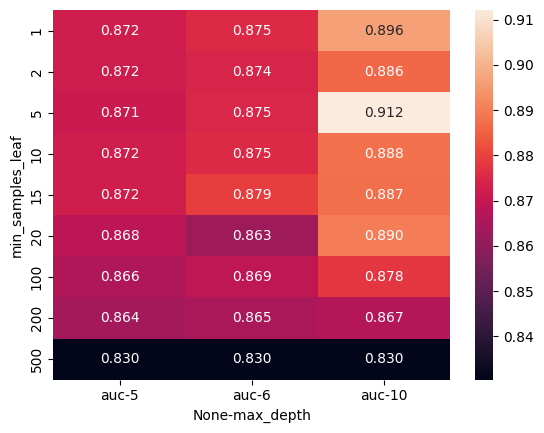

In [58]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f");

In [59]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)

In [60]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.91295840511937)

Random Forests

In [61]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [62]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

np.float64(0.9762336943145459)

In [63]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=seed)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [64]:
df_scores = pd.DataFrame(data=scores, columns=['n_estimators', 'auc'])
df_scores

,n_estimators,auc
0,10,0.971080
1,20,0.975003
2,30,0.978163
3,40,0.979750
4,50,0.981390
5,60,0.984325
6,70,0.984082
7,80,0.983608
8,90,0.983451
9,100,0.984580


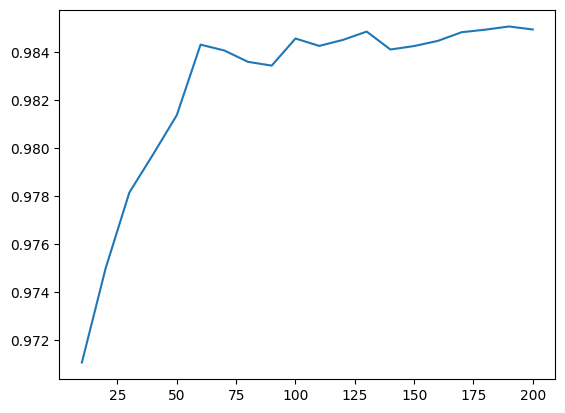

In [65]:
plt.plot(df_scores.n_estimators, df_scores.auc);

Performance is improving util ~60 trees

In [66]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=d,
                                    random_state=seed)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:,1]

        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))

In [67]:
columns=["max_depth", "n_estimators", "auc"]
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.908651
1,5,20,0.906710
2,5,30,0.914472
3,5,40,0.914700
4,5,50,0.913672


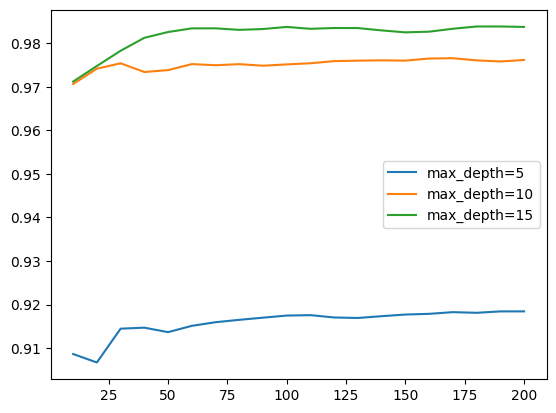

In [68]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth==d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label=f"max_depth={d}")
plt.legend();

We can see that max_depth=15 seems to be the best

In [69]:
scores = []
max_depth = 15

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=seed)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:,1]

        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))

In [70]:
columns=["min_samples_leaf", "n_estimators", "auc"]
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.971194
1,1,20,0.974769
2,1,30,0.978264
3,1,40,0.981239
4,1,50,0.982568


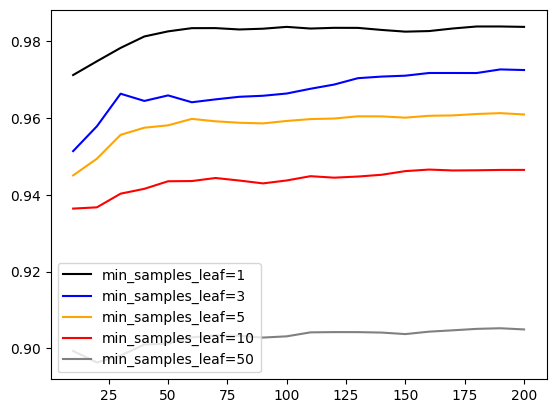

In [71]:
colors = ["black", "blue", "orange", "red", "grey"]
min_samples_leaf_values = [1, 3, 5, 10, 50]

for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf==s]
    plt.plot(df_subset.n_estimators, df_subset.auc, label=f"min_samples_leaf={s}", color=col)
plt.legend();

In [72]:
min_samples_leaf = 1

In [73]:
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=seed)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, random_state=42)

XGBoost

In [163]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 91.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 59.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [166]:
import xgboost as xgb

In [168]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [169]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': seed,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [170]:
y_pred = model.predict(dval)

In [171]:
roc_auc_score(y_val, y_pred)

np.float64(0.9526612109278858)

In [172]:
watchlist = [(dtrain, "train"), (dval, "val")]

In [173]:
%%capture output

xgb_params = {
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": seed,
    "verbosity": 1
}

model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [174]:
print(output.stdout)

[0]	train-auc:0.91682	val-auc:0.86988
[5]	train-auc:0.96188	val-auc:0.93709
[10]	train-auc:0.98514	val-auc:0.95395
[15]	train-auc:0.99198	val-auc:0.96143
[20]	train-auc:0.99643	val-auc:0.96870
[25]	train-auc:0.99850	val-auc:0.97344
[30]	train-auc:0.99924	val-auc:0.97540
[35]	train-auc:0.99966	val-auc:0.97765
[40]	train-auc:0.99989	val-auc:0.97800
[45]	train-auc:0.99996	val-auc:0.98104
[50]	train-auc:0.99999	val-auc:0.98150
[55]	train-auc:0.99999	val-auc:0.98192
[60]	train-auc:1.00000	val-auc:0.98359
[65]	train-auc:1.00000	val-auc:0.98392
[70]	train-auc:1.00000	val-auc:0.98384
[75]	train-auc:1.00000	val-auc:0.98414
[80]	train-auc:1.00000	val-auc:0.98400
[85]	train-auc:1.00000	val-auc:0.98339
[90]	train-auc:1.00000	val-auc:0.98273
[95]	train-auc:1.00000	val-auc:0.98283
[100]	train-auc:1.00000	val-auc:0.98300
[105]	train-auc:1.00000	val-auc:0.98349
[110]	train-auc:1.00000	val-auc:0.98341
[115]	train-auc:1.00000	val-auc:0.98267
[120]	train-auc:1.00000	val-auc:0.98246
[125]	train-auc:1.0000

In [175]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [178]:
df_score = parse_xgb_output(output)
df_score.head()

,num_iter,train_auc,val_auc
0,0,0.91682,0.86988
1,5,0.96188,0.93709
2,10,0.98514,0.95395
3,15,0.99198,0.96143
4,20,0.99643,0.96870


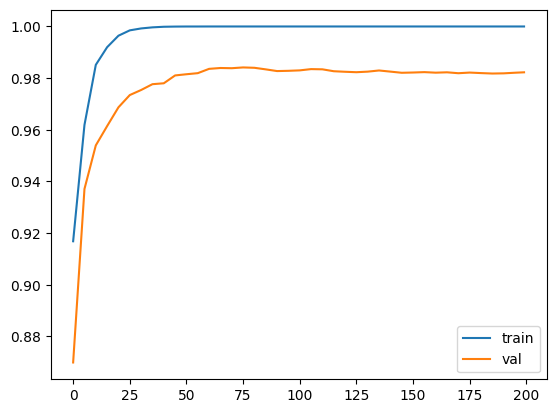

In [177]:
plt.plot(df_score.num_iter, df_score.train_auc, label="train")
plt.plot(df_score.num_iter, df_score.val_auc, label="val")
plt.legend();

In [185]:
# Parameter Tuning
scores = {}

In [204]:
%%capture output

xgb_params = {
    "eta": 0.05,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": seed,
    "verbosity": 1
}

model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [205]:
key = f"eta={xgb_params['eta']}"
scores[key] = parse_xgb_output(output)

In [206]:
scores.keys()

dict_keys(['eta=0.3', 'eta=0.1', 'eta=1', 'eta=0.5', 'eta=0.01', 'eta=0.05'])

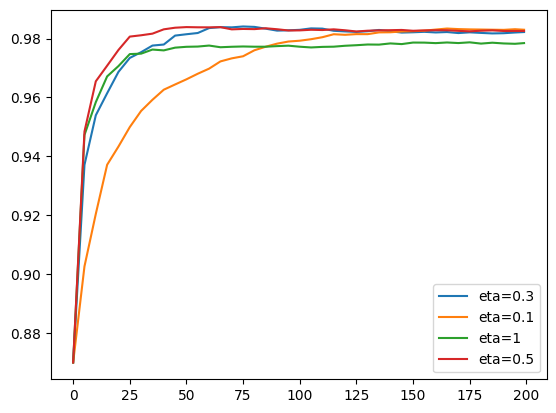

In [215]:
etas = ['eta=0.3', 'eta=0.1', 'eta=1', 'eta=0.5']
for eta in etas:
    df_score = scores[eta] 
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

eta=0.5 seems to be the best

In [217]:
scores = {}

In [227]:
%%capture output

xgb_params = {
    "eta": 0.5,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1
}

model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [228]:
key = f"max_depth={xgb_params['max_depth']}"
scores[key] = parse_xgb_output(output)

In [229]:
scores.keys()

dict_keys(['max_depth=10', 'max_depth=15', 'max_depth=5', 'max_depth=6'])

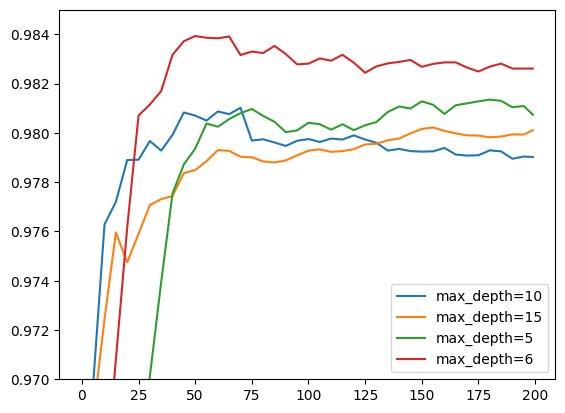

In [236]:
for key, df_scores in scores.items():
    plt.plot(df_scores.num_iter, df_scores.val_auc, label=key)
plt.ylim(0.97,0.985)
plt.legend()

max_depth=6 seems to be the best

In [238]:
scores = {}

In [250]:
%%capture output

xgb_params = {
    "eta": 0.5,
    "max_depth": 6,
    "min_child_weight": 5,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1
}

model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [251]:
key = f"min_child_weight={xgb_params['min_child_weight']}"
scores[key] = parse_xgb_output(output)

In [252]:
scores.keys()

dict_keys(['min_child_weight=30', 'min_child_weight=10', 'min_child_weight=1', 'min_child_weight=5'])

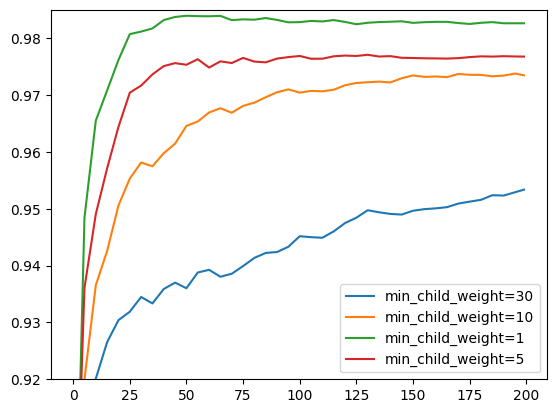

In [253]:
for key, df_scores in scores.items():
    plt.plot(df_scores.num_iter, df_scores.val_auc, label=key)
plt.ylim(0.92,0.985)
plt.legend()

Selecting the final model

In [255]:
# Logistic regression
dv, model = train(df_train, y_train)
y_pred = predict(df_val, dv, model)
auc = roc_auc_score(y_val, y_pred)
print(f'AUC on validation set: %.3f' % auc)

AUC on validation set: 0.901


In [256]:
# Decision Trees
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print(f'AUC on validation set: %.3f' % auc)

AUC on validation set: 0.911


In [258]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=15,
                            min_samples_leaf=1,
                            random_state=seed)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print(f'AUC on validation set: %.3f' % auc)

AUC on validation set: 0.984


In [ ]:
# XGBoost
xgb_params = {
    "eta": 0.5,
    "max_depth": 6,
    "min_child_weight": 10,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1
}

model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [262]:
y_pred = model.predict(dval)
auc = roc_auc_score(y_val, y_pred)
print(f'AUC on validation set: %.3f' % auc)

AUC on validation set: 0.973
